In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("../Datasets/Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.drop("CustomerID",axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [4]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


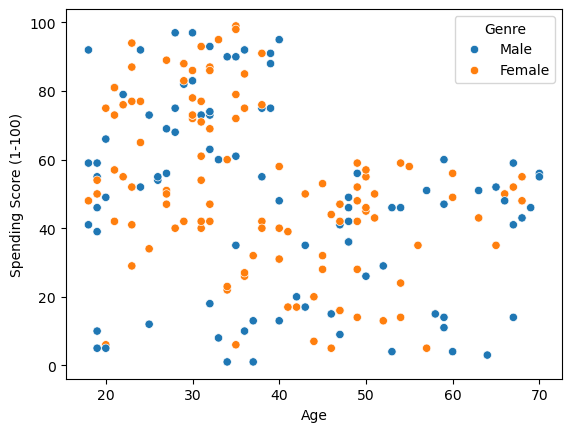

In [5]:
sns.scatterplot(x=df["Age"],y=df["Spending Score (1-100)"],hue=df["Genre"])
plt.show()

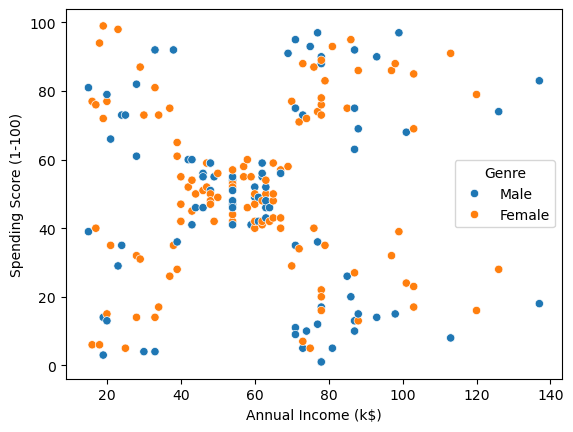

In [6]:
sns.scatterplot(x=df["Annual Income (k$)"],y=df["Spending Score (1-100)"],hue=df["Genre"])
plt.show()

In [7]:
def plot_histograms(df,title="Orjinal_"):
    import math
    numeric_columns = [col for col in df.columns if df[col].dtype != "O"]
    n_columns = 3
    n_rows = math.ceil(len(numeric_columns)/n_columns)
    plt.figure(figsize=(13,5))
    for i,col in enumerate(numeric_columns,1):
        plt.subplot(n_rows,n_columns,i)
        sns.histplot(df[col],kde=True)
        plt.title(title+col)
    plt.tight_layout()
    plt.show()

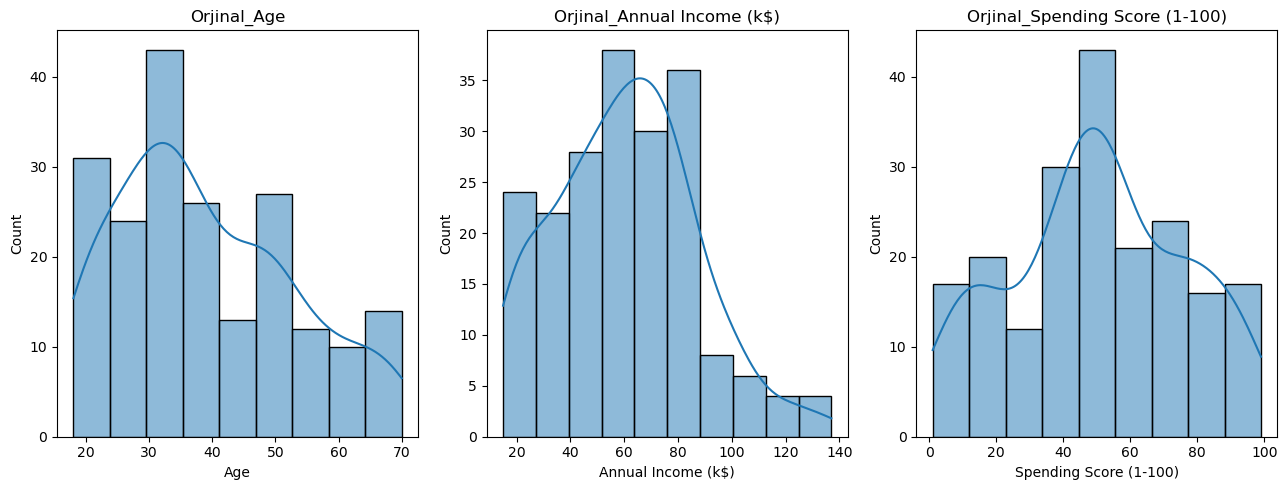

In [8]:
plot_histograms(df)

In [9]:
df = pd.get_dummies(df,columns=["Genre"],drop_first=True,dtype=int)
df

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled,columns=df.columns)
df_scaled

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,0.019231,0.000000,0.387755,1.0
1,0.057692,0.000000,0.816327,1.0
2,0.038462,0.008197,0.051020,0.0
3,0.096154,0.008197,0.775510,0.0
4,0.250000,0.016393,0.397959,0.0
...,...,...,...,...
195,0.326923,0.860656,0.795918,0.0
196,0.519231,0.909836,0.275510,0.0
197,0.269231,0.909836,0.744898,1.0
198,0.269231,1.000000,0.173469,1.0


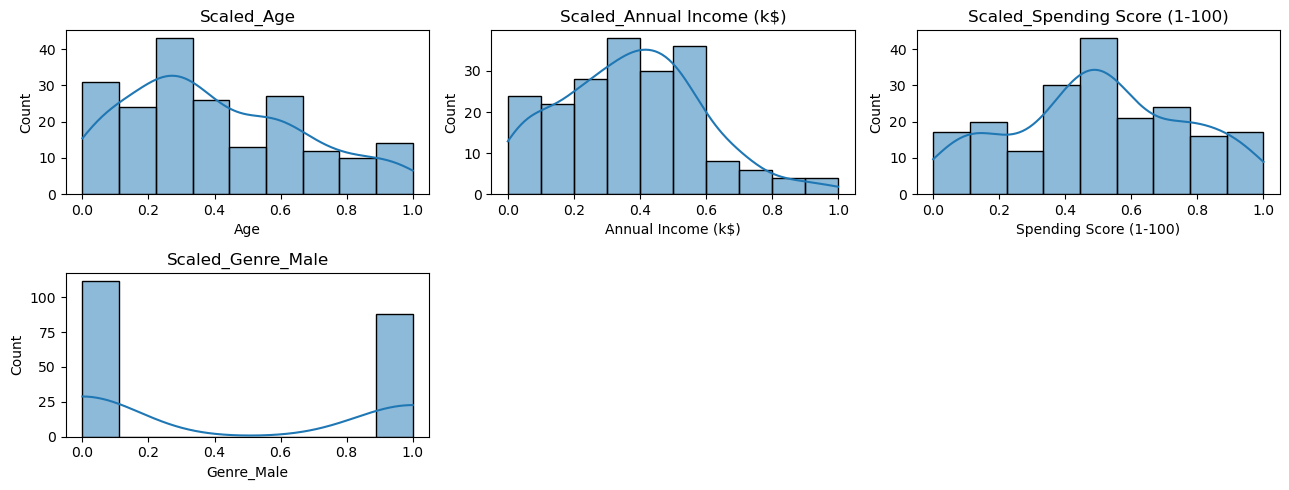

In [12]:
plot_histograms(df_scaled,title="Scaled_")

In [13]:
import scipy.cluster.hierarchy as sch

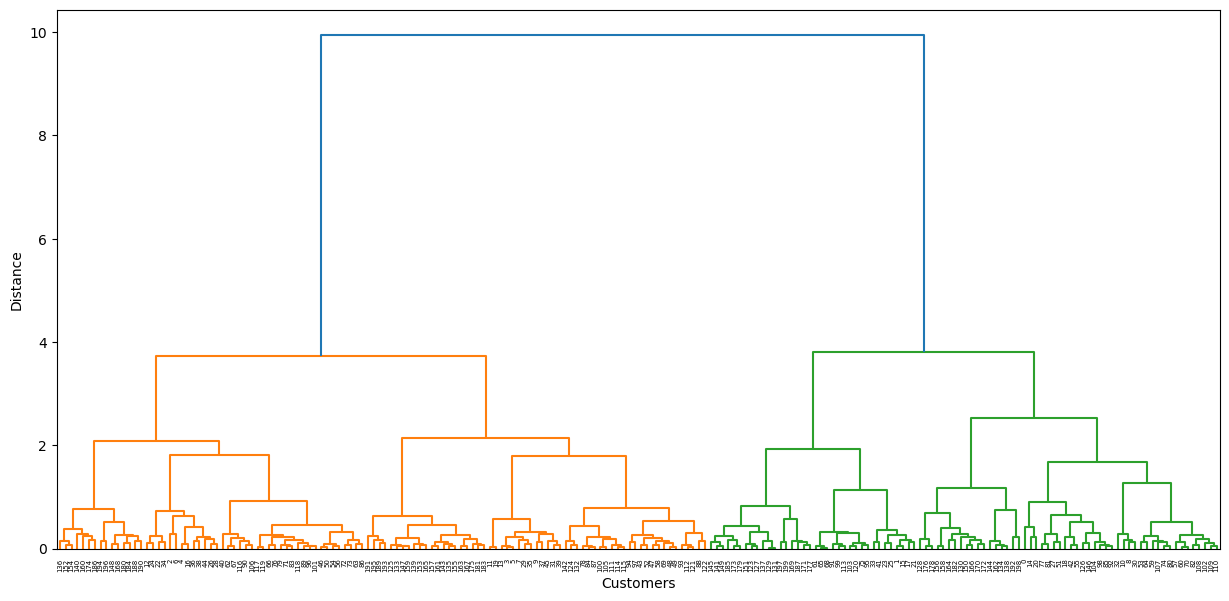

In [14]:
plt.figure(figsize=(15,7))
dendogram = sch.dendrogram(sch.linkage(df_scaled,method="ward"))
plt.ylabel("Distance")
plt.xlabel("Customers")
plt.show()

In [15]:
# bu dendograma göre 4 ila 6 cluster yeterli olacaktır gibi görünüyor.

In [16]:
from sklearn.cluster import AgglomerativeClustering

In [17]:
hc = AgglomerativeClustering(n_clusters=4)
hc

AgglomerativeClustering(n_clusters=4)

In [18]:
hc_preds = hc.fit_predict(df_scaled)

In [19]:
hc_preds

array([0, 2, 3, 1, 3, 1, 3, 1, 0, 1, 0, 1, 3, 1, 0, 2, 3, 2, 0, 1, 0, 2,
       3, 2, 3, 2, 3, 0, 3, 1, 0, 1, 0, 2, 3, 1, 3, 1, 3, 1, 3, 2, 0, 1,
       3, 1, 3, 1, 1, 1, 3, 0, 1, 0, 3, 0, 3, 0, 1, 0, 0, 2, 3, 3, 0, 2,
       3, 3, 2, 1, 0, 3, 3, 3, 0, 2, 3, 0, 1, 3, 0, 0, 0, 3, 1, 0, 3, 1,
       1, 3, 3, 2, 0, 1, 1, 2, 3, 1, 0, 2, 1, 3, 0, 2, 0, 1, 3, 0, 0, 0,
       0, 1, 1, 2, 1, 1, 3, 3, 3, 3, 2, 1, 1, 2, 1, 1, 0, 2, 0, 2, 0, 2,
       1, 1, 0, 1, 3, 2, 0, 1, 3, 2, 1, 1, 0, 2, 0, 1, 3, 2, 0, 2, 3, 1,
       3, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 3, 2, 0, 2, 0, 2, 3, 1,
       0, 2, 0, 2, 3, 1, 0, 1, 3, 2, 3, 2, 3, 1, 3, 1, 0, 1, 3, 1, 3, 2,
       0, 2], dtype=int64)

In [20]:
score = silhouette_score(df_scaled,hc_preds)
score

0.3444266582171814

In [21]:
df_scaled["cluster"] = pd.DataFrame(hc_preds)
df_scaled

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,cluster
0,0.019231,0.000000,0.387755,1.0,0
1,0.057692,0.000000,0.816327,1.0,2
2,0.038462,0.008197,0.051020,0.0,3
3,0.096154,0.008197,0.775510,0.0,1
4,0.250000,0.016393,0.397959,0.0,3
...,...,...,...,...,...
195,0.326923,0.860656,0.795918,0.0,1
196,0.519231,0.909836,0.275510,0.0,3
197,0.269231,0.909836,0.744898,1.0,2
198,0.269231,1.000000,0.173469,1.0,0


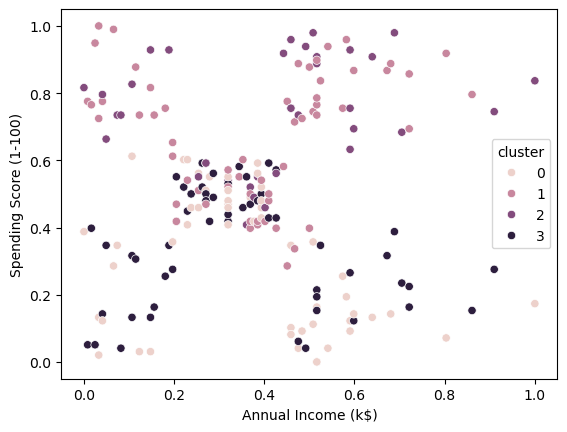

In [22]:
sns.scatterplot(x=df_scaled["Annual Income (k$)"],y=df_scaled["Spending Score (1-100)"],hue=df_scaled["cluster"])
plt.show()

In [23]:
X = df[["Annual Income (k$)","Spending Score (1-100)"]].copy()
hc = AgglomerativeClustering(n_clusters=5)
hc

AgglomerativeClustering(n_clusters=5)

In [24]:
hc_preds = hc.fit_predict(X)

In [25]:
score = silhouette_score(X,hc_preds)
score

0.5529945955148897

In [26]:
X["cluster"] = pd.DataFrame(hc_preds)
X

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,0
197,126,74,2
198,137,18,0


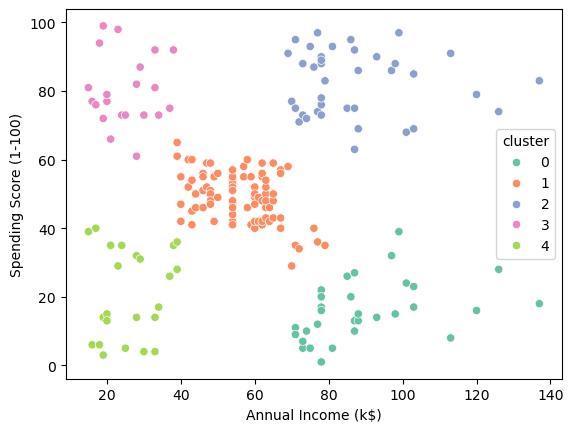

In [27]:
sns.scatterplot(x=X["Annual Income (k$)"],y=X["Spending Score (1-100)"],hue=X["cluster"],palette="Set2")
plt.show()

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
from sklearn.metrics import davies_bouldin_score,calinski_harabasz_score

In [30]:
df = pd.read_csv("../Datasets/Mall_Customers.csv")
df = df.drop("CustomerID", axis = 1)
le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])

features_2d = ["Annual Income (k$)","Spending Score (1-100)"]
features_3d = ["Age","Annual Income (k$)","Spending Score (1-100)"]
features_4d = ["Genre","Age","Annual Income (k$)","Spending Score (1-100)"]

for feats in [features_2d,features_3d,features_4d]:
    X = df[feats]
    X_scaled = MinMaxScaler().fit_transform(X)

    hc = AgglomerativeClustering(n_clusters=5)
    y_hc = hc.fit_predict(X_scaled)

    sil = silhouette_score(X_scaled, y_hc)
    db = davies_bouldin_score(X_scaled, y_hc)
    ch = calinski_harabasz_score(X_scaled, y_hc)

    
    print(f"\n features :{feats}")
    print("Silhoutte score: ", sil)
    print("Davies Bouldin score: ", db)
    print("Calinski Harabasz score: ", ch)
    print("-------------")


 features :['Annual Income (k$)', 'Spending Score (1-100)']
Silhoutte score:  0.5582698727324804
Davies Bouldin score:  0.5734519252471812
Calinski Harabasz score:  258.97400737720704
-------------

 features :['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Silhoutte score:  0.3955454334726547
Davies Bouldin score:  0.8746143334035464
Calinski Harabasz score:  123.99070840826577
-------------

 features :['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Silhoutte score:  0.35032447507156306
Davies Bouldin score:  1.0941951795238571
Calinski Harabasz score:  163.46602356383625
-------------
